# **Initial Data Cleaning for Farmers Markets and Food Insecurity**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas_profiling 

In [3]:
%matplotlib inline

## Food Insecurity Exploration

In [4]:
states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

I am exploring food insecurity by county using the Map the Meal Gap data

In [5]:
# reading in the food insecurity file
food_insecurity = pd.read_csv('../../data/MMG_2017_Data.csv')

In [6]:
food_insecurity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FIPS                              3142 non-null   int64  
 1   state                             3142 non-null   object 
 2   county_state                      3142 non-null   object 
 3    fi_rate                          3142 non-null   object 
 4   total_fi_people                   3142 non-null   object 
 5   child_fi_rate                     3142 non-null   object 
 6   num_fi_children                   3142 non-null   object 
 7   cost_per_meal                     3142 non-null   object 
 8   est_annual_food_budget_shortfall  3142 non-null   object 
 9   Unnamed: 9                        0 non-null      float64
dtypes: float64(1), int64(1), object(8)
memory usage: 245.6+ KB


In [7]:
food_insecurity.to_csv("../../data/fi_data")

#### Work on Copy

In [8]:
# making ahttp://localhost:8888/notebooks/Documents/Initial%20Data%20Cleaning/initial_data_cleaning_SH.ipynb# copy I can play around with before making changes to the actual data
food_insecurity_copy = food_insecurity.copy()

In [9]:
# testing this out on the copy
del food_insecurity_copy["Unnamed: 9"]
del food_insecurity_copy["county_state"]

In [10]:
# doing the same to the copy
food_insecurity_copy.columns = ["fips","state","fi_rate","total_fi_people", "child_fi_rate", "num_fi_children", "cost_per_meal", "est_annual_food_budget_shortfall"]

In [11]:
# adding region column
food_insecurity_copy["region"] = food_insecurity_copy["state"].map(states)

In [12]:
food_insecurity_copy.dtypes

fips                                 int64
state                               object
fi_rate                             object
total_fi_people                     object
child_fi_rate                       object
num_fi_children                     object
cost_per_meal                       object
est_annual_food_budget_shortfall    object
region                              object
dtype: object

In [13]:
#removing the percent symbol from fi_rate
fi_rate_clean = food_insecurity_copy["fi_rate"].str.replace(r"%", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(fi_rate = fi_rate_clean)

#removing the the percent symbol from child_fi_rate
child_fi_rate_clean = food_insecurity_copy["child_fi_rate"].str.replace(r"%", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(child_fi_rate = child_fi_rate_clean)

#removing dollar signs
no_dollar_cpm = food_insecurity_copy["cost_per_meal"].str.replace(r"$", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(cost_per_meal = no_dollar_cpm)

no_dollar_sf = food_insecurity_copy["est_annual_food_budget_shortfall"].str.replace(r"$", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(est_annual_food_budget_shortfall = no_dollar_sf)

#removing commas
no_commas_fi = food_insecurity_copy["total_fi_people"].str.replace(r",", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(total_fi_people = no_commas_fi)

no_commas_num = food_insecurity_copy["num_fi_children"].str.replace(r",", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(num_fi_children = no_commas_num)

no_commas_sf = food_insecurity_copy["est_annual_food_budget_shortfall"].str.replace(r",", "", regex=True)
food_insecurity_copy = food_insecurity_copy.assign(est_annual_food_budget_shortfall = no_commas_sf)

In [14]:
food_insecurity_copy.dtypes

fips                                 int64
state                               object
fi_rate                             object
total_fi_people                     object
child_fi_rate                       object
num_fi_children                     object
cost_per_meal                       object
est_annual_food_budget_shortfall    object
region                              object
dtype: object

In [15]:
# changing fips to category
food_insecurity_copy['fips'] = food_insecurity_copy['fips'].astype('category')
food_insecurity_copy['region'] = food_insecurity_copy['region'].astype('category')

# changing strings to numeric values 
food_insecurity_copy['fi_rate'] = pd.to_numeric(food_insecurity_copy['fi_rate'])
food_insecurity_copy['total_fi_people'] = pd.to_numeric(food_insecurity_copy['total_fi_people'])
food_insecurity_copy['child_fi_rate'] = pd.to_numeric(food_insecurity_copy['child_fi_rate'])
#food_insecurity_copy['num_fi_children'] = pd.to_numeric(food_insecurity_copy['num_fi_children'])
food_insecurity_copy['cost_per_meal'] = pd.to_numeric(food_insecurity_copy['cost_per_meal'])
food_insecurity_copy['est_annual_food_budget_shortfall'] = pd.to_numeric(food_insecurity_copy['est_annual_food_budget_shortfall'])

#### Real df

In [16]:
food_insecurity

,FIPS,state,county_state,fi_rate,total_fi_people,child_fi_rate,num_fi_children,cost_per_meal,est_annual_food_budget_shortfall,Unnamed: 9
0,1001,AL,"Autauga County, Alabama",13.2%,"7,270",19.8%,"2,670",$3.19,"$3,957,000.00",NaN
1,1003,AL,"Baldwin County, Alabama",11.6%,"23,560",18.9%,"8,480",$3.57,"$14,361,000.00",NaN
2,1005,AL,"Barbour County, Alabama",22.0%,"5,760",27.6%,"1,520",$3.09,"$3,035,000.00",NaN
3,1007,AL,"Bibb County, Alabama",14.3%,"3,240",22.1%,"1,050",$3.05,"$1,684,000.00",NaN
4,1009,AL,"Blount County, Alabama",10.7%,"6,140",21.2%,"2,880",$3.10,"$3,249,000.00",NaN
...,...,...,...,...,...,...,...,...,...,...
3137,56037,WY,"Sweetwater County, Wyoming",10.7%,"4,750",17.0%,"2,030",$3.14,"$2,542,000.00",NaN
3138,56039,WY,"Teton County, Wyoming",9.7%,"2,220",11.7%,520,$4.20,"$1,592,000.00",NaN
3139,56041,WY,"Uinta County, Wyoming",12.8%,"2,660",18.9%,"1,160",$2.95,"$1,340,000.00",NaN
3140,56043,WY,"Washakie County, Wyoming",11.2%,920,17.4%,350,$3.16,"$497,000.00",NaN


In [17]:
# deleting county_state because it does not match our naming conventions; the FIPS remains in tact. Thus its fine.
del food_insecurity["Unnamed: 9"]
del food_insecurity["county_state"]

In [18]:
# I had to change the FIPS from uppercase to lowercase
food_insecurity.columns = ["fips","state","fi_rate","total_fi_people", "child_fi_rate","num_fi_children", "cost_per_meal", "est_annual_food_budget_shortfall"]

In [19]:
# adding region column
food_insecurity["region"] = food_insecurity["state"].map(states)

In [20]:
#removing the percent symbol from fi_rate
fi_rate_clean = food_insecurity["fi_rate"].str.replace(r"%", "", regex=True)
food_insecurity = food_insecurity.assign(fi_rate = fi_rate_clean)

#removing the the percent symbol from child_fi_rate
child_fi_rate_clean = food_insecurity["child_fi_rate"].str.replace(r"%", "", regex=True)
food_insecurity = food_insecurity.assign(child_fi_rate = child_fi_rate_clean)

#removing dollar signs
no_dollar_cpm = food_insecurity["cost_per_meal"].str.replace(r"$", "", regex=True)
food_insecurity = food_insecurity.assign(cost_per_meal = no_dollar_cpm)

no_dollar_sf = food_insecurity["est_annual_food_budget_shortfall"].str.replace(r"$", "", regex=True)
food_insecurity = food_insecurity.assign(est_annual_food_budget_shortfall = no_dollar_sf)

#removing commas
no_commas_fi = food_insecurity["total_fi_people"].str.replace(r",", "", regex=True)
food_insecurity = food_insecurity.assign(total_fi_people = no_commas_fi)

no_commas_num = food_insecurity["num_fi_children"].str.replace(r",", "", regex=True)
food_insecurity = food_insecurity.assign(num_fi_children = no_commas_num)

no_commas_sf = food_insecurity["est_annual_food_budget_shortfall"].str.replace(r",", "", regex=True)
food_insecurity = food_insecurity.assign(est_annual_food_budget_shortfall = no_commas_sf)

In [21]:
# changing fips to category
food_insecurity['fips'] = food_insecurity['fips'].astype('category')
food_insecurity['region'] = food_insecurity['region'].astype('category')

# changing strings to numeric values 
food_insecurity['fi_rate'] = pd.to_numeric(food_insecurity['fi_rate'])
food_insecurity['total_fi_people'] = pd.to_numeric(food_insecurity['total_fi_people'])
food_insecurity['child_fi_rate'] = pd.to_numeric(food_insecurity['child_fi_rate'])
#food_insecurity['num_fi_children'] = pd.to_numeric(food_insecurity['num_fi_children'])
food_insecurity['cost_per_meal'] = pd.to_numeric(food_insecurity['cost_per_meal'])
food_insecurity['est_annual_food_budget_shortfall'] = pd.to_numeric(food_insecurity['est_annual_food_budget_shortfall'])

In [22]:
food_insecurity.describe()

,fi_rate,total_fi_people,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3.142000e+03
mean,13.250796,1.282431e+04,19.366741,3.020035,6.907029e+06
std,3.960291,4.119477e+04,4.473126,0.317325,2.295224e+07
min,2.900000,1.000000e+01,6.400000,2.070000,5.000000e+03
25%,10.600000,1.480000e+03,16.300000,2.830000,7.380000e+05
50%,12.800000,3.505000e+03,19.100000,2.980000,1.779000e+06
75%,15.200000,8.910000e+03,22.300000,3.160000,4.510250e+06
max,36.300000,1.135710e+06,39.600000,6.200000,6.569320e+08


In [23]:
# Checking for NaN values. They have 'nan' in place of NaN

food_insecurity.isnull().values.any()
food_insecurity.min()

state                                   AK
fi_rate                                2.9
total_fi_people                         10
child_fi_rate                          6.4
num_fi_children                       -   
cost_per_meal                         2.07
est_annual_food_budget_shortfall    5000.0
dtype: object

In [24]:
# Checking to see if theres a -9999 or a blank cell

res2 = food_insecurity.isin(['-9999','', 'NaN', '-']).any().any()
  
if res2:
    print("\nany of the mention value exists in Dataframe")
      
else:
    print("\nNone of thses values exists in Dataframe")


None of thses values exists in Dataframe


In [25]:
region_fi = food_insecurity_copy[["region", "fi_rate"]]

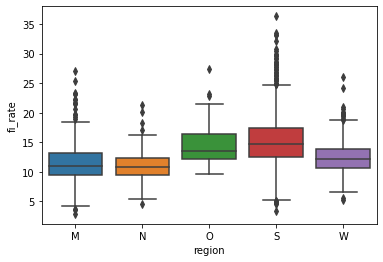

In [26]:
fi_boxplot = sns.boxplot(x="region", y="fi_rate", showfliers= True, data= region_fi)

Food Insecurity (FI) is generally higher in the South; however, it is not significant. 

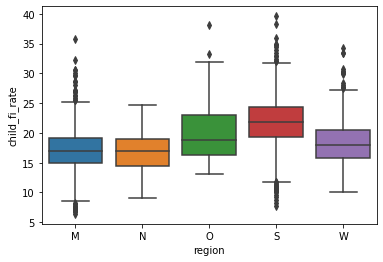

In [27]:
child_fi_boxplot = sns.boxplot(x="region", y="child_fi_rate", showfliers= True, data= food_insecurity)

child food insecurity is again generally higher in the south but not significant

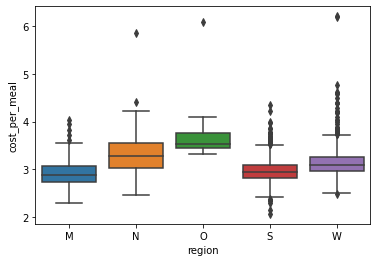

In [28]:
cpm_boxplot = sns.boxplot(x="region", y="cost_per_meal", showfliers= True, data= food_insecurity)

The cost per meal is highest in "other" and the north.  Surprisngly, its lowest in the south. Again, its not super significant but worth noting

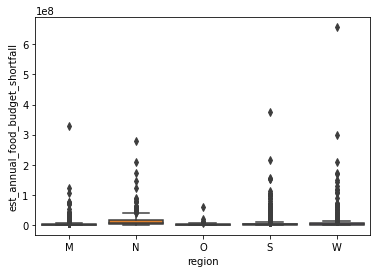

In [29]:
budget_boxplot = sns.boxplot(x="region", y="est_annual_food_budget_shortfall", showfliers= True, data= food_insecurity)

estimated annual food shortfall budget is around the thousands with numerous outliers, but this graph is mostly useless

In [30]:
region_fi_avg = food_insecurity.groupby('region').mean()
region_fi_avg

,fi_rate,total_fi_people,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall
region,,,,,
M,11.322981,7682.923777,16.998407,2.903197,3.850265e+06
N,10.889388,28187.918367,16.727755,3.317918,1.665676e+07
O,14.729412,7298.823529,20.602941,3.681765,4.413588e+06
S,15.214491,11598.586801,21.713989,2.967023,6.059086e+06
W,12.378644,17318.728814,18.373898,3.157525,9.559608e+06


Text(0, 0.5, 'Shortfall in USD')

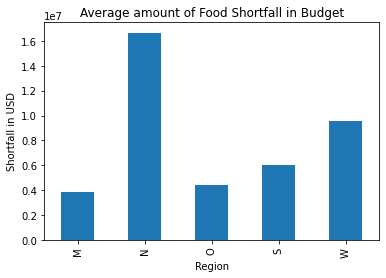

In [31]:
# creating boxplot
budget_bp = region_fi_avg["est_annual_food_budget_shortfall"].plot.bar()

# labeling 
budget_bp.set_title("Average amount of Food Shortfall in Budget")
budget_bp.set_xlabel("Region")
budget_bp.set_ylabel("Shortfall in USD")

The North. Yikes

Text(0, 0.5, 'Rate')

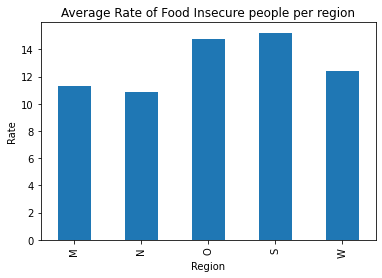

In [32]:
# creating boxplot
boxplot = region_fi_avg["fi_rate"].plot.bar()

# labeling 
boxplot.set_title("Average Rate of Food Insecure people per region")
boxplot.set_xlabel("Region")
boxplot.set_ylabel("Rate")

In [65]:
food_insecurity

,fips,state,fi_rate,total_fi_people,child_fi_rate,num_fi_children,cost_per_meal,est_annual_food_budget_shortfall,region
0,1001,AL,13.2,7270,19.8,2670,3.19,3957000.0,S
1,1003,AL,11.6,23560,18.9,8480,3.57,14361000.0,S
2,1005,AL,22.0,5760,27.6,1520,3.09,3035000.0,S
3,1007,AL,14.3,3240,22.1,1050,3.05,1684000.0,S
4,1009,AL,10.7,6140,21.2,2880,3.10,3249000.0,S
...,...,...,...,...,...,...,...,...,...
3137,56037,WY,10.7,4750,17.0,2030,3.14,2542000.0,W
3138,56039,WY,9.7,2220,11.7,520,4.20,1592000.0,W
3139,56041,WY,12.8,2660,18.9,1160,2.95,1340000.0,W
3140,56043,WY,11.2,920,17.4,350,3.16,497000.0,W


## Farner's Market Data

Cleaning farmer's market data

In [34]:
# reading in the food insecurity file
farm = pd.read_csv('Data/local_farm_Data.csv')

In [35]:
farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3143 non-null   int64  
 1   State                     3143 non-null   object 
 2   County                    3143 non-null   object 
 3   farmers_markets_2018      3142 non-null   float64
 4   farmers_markets_per_1000  3140 non-null   float64
 5   fm_accepts_snap           3142 non-null   float64
 6   pct_fm_accepting_snap     3142 non-null   float64
 7   fm_accept_wic             3142 non-null   float64
 8   pct_fm_accept_wic         3142 non-null   float64
 9   fm_accept_wic_cash        3142 non-null   float64
 10  pct_fm_accept_wic_cash    3142 non-null   float64
 11  fm_accept_sfmnp           3142 non-null   float64
 12  pct_fm_accept_sfmnp       3142 non-null   float64
 13  fm_accept_credit          3142 non-null   float64
 14  pct_fm_c

In [36]:
farm = farm.drop_duplicates(subset=['FIPS'])

In [37]:
farm

,FIPS,State,County,farmers_markets_2018,farmers_markets_per_1000,fm_accepts_snap,pct_fm_accepting_snap,fm_accept_wic,pct_fm_accept_wic,fm_accept_wic_cash,pct_fm_accept_wic_cash,fm_accept_sfmnp,pct_fm_accept_sfmnp,fm_accept_credit,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,fm_sell_anipr,pct_fm_sell_anipr
0,1001,AL,Autauga,1.0,0.017985,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,100.0,0.0,0.000000
1,1003,AL,Baldwin,4.0,0.018347,0.0,0.000000,0.0,0.0,0.0,0.0,4.0,100.0,2.0,50.000000,3.0,75.0,4.0,100.000000
2,1005,AL,Barbour,4.0,0.160765,2.0,50.000000,0.0,0.0,0.0,0.0,2.0,50.0,2.0,50.000000,2.0,50.0,0.0,0.000000
3,1007,AL,Bibb,1.0,0.044643,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,1009,AL,Blount,1.0,0.017289,0.0,0.000000,1.0,100.0,0.0,0.0,1.0,100.0,0.0,0.000000,1.0,100.0,1.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,2.0,0.046457,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3139,56039,WY,Teton,3.0,0.129977,1.0,33.333332,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.666664,3.0,100.0,2.0,66.666664
3140,56041,WY,Uinta,2.0,0.098527,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.000000,0.0,0.0,0.0,0.000000
3141,56043,WY,Washakie,2.0,0.253646,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,2.0,100.0,2.0,100.000000


In [38]:
farm.columns = ['fips','state', 'county', 'farmers_markets', 'farmers_markets_per_1000', 'fm_accepts_snap', 'pct_fm_accepting_snap', 'fm_accept_wic', 'pct_fm_accept_wic','fm_accept_wic_cash', 'pct_fm_accept_wic_cash', 'fm_accept_sfmnp', 'pct_fm_accept_sfmnp', 'fm_accept_credit', 'pct_fm_credit', 'fm_sell_frveg', 'pct_fm_sell_frveg', 'fm_sell_anipr', 'pct_fm_sell_anipr']

In [39]:
farm["region"] = farm["state"].map(states)

In [40]:
del farm["fm_accept_sfmnp"]
del farm["pct_fm_accept_sfmnp"]
del farm["fm_accept_wic_cash"]
del farm["pct_fm_accept_wic_cash"]
del farm["fm_sell_anipr"]
del farm["pct_fm_sell_anipr"]

In [41]:
farm.dtypes

fips                          int64
state                        object
county                       object
farmers_markets             float64
farmers_markets_per_1000    float64
fm_accepts_snap             float64
pct_fm_accepting_snap       float64
fm_accept_wic               float64
pct_fm_accept_wic           float64
fm_accept_credit            float64
pct_fm_credit               float64
fm_sell_frveg               float64
pct_fm_sell_frveg           float64
region                       object
dtype: object

In [42]:
farm["fips"] = farm["fips"].astype("category")

In [43]:
farm.describe()

,farmers_markets,farmers_markets_per_1000,fm_accepts_snap,pct_fm_accepting_snap,fm_accept_wic,pct_fm_accept_wic,fm_accept_credit,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg
count,3142.000000,3140.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2.756525,0.059385,0.914386,18.845784,0.852323,16.057862,1.604710,38.037682,1.831636,46.771902
std,5.819495,0.100356,2.917630,32.317212,2.946811,30.714804,3.884805,41.835732,4.141478,44.063487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.029985,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,50.000000
75%,3.000000,0.071691,1.000000,33.333332,1.000000,17.401960,2.000000,80.000000,2.000000,100.000000
max,124.000000,1.472754,53.000000,100.000000,49.000000,100.000000,69.000000,100.000000,69.000000,100.000000


In [44]:
# Checking to see if theres a -9999 or a blank cell

res = farm.isin([-9999, np.nan]).any().any()
  
if res:
    print("\nany of the mention value exists in Dataframe")
      
else:
    print("\nNone of thses values exists in Dataframe")


any of the mention value exists in Dataframe


In [45]:
# Checking for NaN values. They have 'nan' in place of NaN

farm.isnull().values.any()
farm.isnull().sum().sum()

12

In [46]:
farm['farmers_markets'].unique()

array([  1.,   4.,   2.,   0.,   3.,  17.,   7.,   5.,   8.,  10.,   6.,
        nan,  39.,  24.,  11.,  34.,  25.,  15.,  14.,  16., 124.,  12.,
         9.,  23.,  19.,  22.,  27.,  46.,  28.,  21.,  13.,  18.,  30.,
        35.,  58.,  31.,  43., 113.,  20.,  60.,  29.,  42.,  44.,  50.,
        41.,  40.])

In [47]:
farm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   fips                      3143 non-null   category
 1   state                     3143 non-null   object  
 2   county                    3143 non-null   object  
 3   farmers_markets           3142 non-null   float64 
 4   farmers_markets_per_1000  3140 non-null   float64 
 5   fm_accepts_snap           3142 non-null   float64 
 6   pct_fm_accepting_snap     3142 non-null   float64 
 7   fm_accept_wic             3142 non-null   float64 
 8   pct_fm_accept_wic         3142 non-null   float64 
 9   fm_accept_credit          3142 non-null   float64 
 10  pct_fm_credit             3142 non-null   float64 
 11  fm_sell_frveg             3142 non-null   float64 
 12  pct_fm_sell_frveg         3142 non-null   float64 
 13  region                    3143 non-null   object

In [48]:
farm_avg = farm.groupby("region").mean()

In [49]:
farm_avg

,farmers_markets,farmers_markets_per_1000,fm_accepts_snap,pct_fm_accepting_snap,fm_accept_wic,pct_fm_accept_wic,fm_accept_credit,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg
region,,,,,,,,,,
M,2.369738,0.077850,0.601820,16.577481,0.536974,15.734430,1.255973,36.894711,1.535836,48.687942
N,8.934694,0.063494,3.448980,29.797785,4.204082,40.295392,5.420408,54.362060,6.257143,63.356304
O,4.121212,0.079126,1.484848,10.335647,0.454545,12.857143,2.333333,25.011794,2.272727,25.664501
S,1.525448,0.033647,0.399283,15.685536,0.210753,8.771513,0.902509,34.270623,1.005018,41.411199
W,3.601695,0.089907,1.513559,25.625408,1.469492,23.881897,2.159322,42.597173,2.364407,50.886053


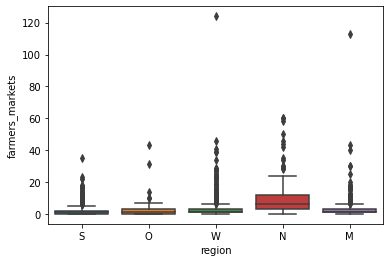

In [50]:
fm_boxplot = sns.boxplot(x="region", y="farmers_markets", showfliers= True, data= farm)

Text(0, 0.5, 'Number per 1000 people')

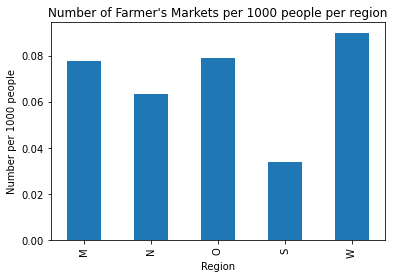

In [51]:
# creating boxplot
farms_per_plot = farm_avg["farmers_markets_per_1000"].plot.bar()

#labeling
farms_per_plot.set_title("Number of Farmer's Markets per 1000 people per region")
farms_per_plot.set_xlabel("Region")
farms_per_plot.set_ylabel("Number per 1000 people")

Text(0, 0.5, 'Number selling fruits and vegetables')

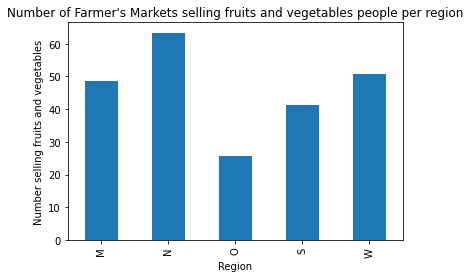

In [52]:
# creating boxplot
farms_per_plot = farm_avg["pct_fm_sell_frveg"].plot.bar()

#labeling
farms_per_plot.set_title("Number of Farmer's Markets selling fruits and vegetables people per region")
farms_per_plot.set_xlabel("Region")
farms_per_plot.set_ylabel("Number selling fruits and vegetables")

Text(0, 0.5, 'Percentage accepting SNAP')

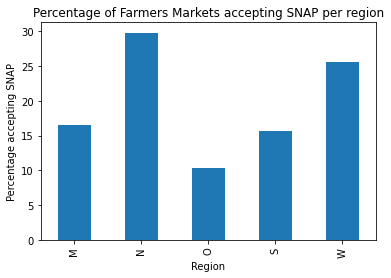

In [53]:
# creating boxplot
farms_per_plot = farm_avg["pct_fm_accepting_snap"].plot.bar()

#labeling
farms_per_plot.set_title("Percentage of Farmers Markets accepting SNAP per region")
farms_per_plot.set_xlabel("Region")
farms_per_plot.set_ylabel("Percentage accepting SNAP")

Text(0, 0.5, 'Percentage accepting WIC')

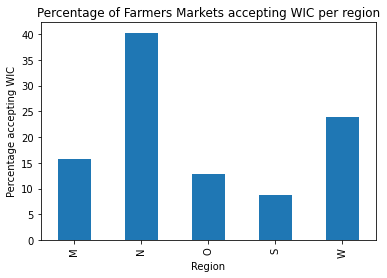

In [54]:
# creating boxplot
farms_per_plot = farm_avg["pct_fm_accept_wic"].plot.bar()

#labeling
farms_per_plot.set_title("Percentage of Farmers Markets accepting WIC per region")
farms_per_plot.set_xlabel("Region")
farms_per_plot.set_ylabel("Percentage accepting WIC")

Text(0, 0.5, 'Percentage accepting credit cards')

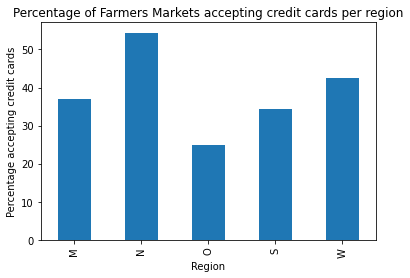

In [55]:
# creating boxplot
farms_per_plot = farm_avg["pct_fm_credit"].plot.bar()

#labeling
farms_per_plot.set_title("Percentage of Farmers Markets accepting credit cards per region")
farms_per_plot.set_xlabel("Region")
farms_per_plot.set_ylabel("Percentage accepting credit cards")

In [56]:
farm.to_csv('Data/farmers_markets.csv', index=False, na_rep='NaN')

### Joinging them and looking at both

In [57]:
# outer_merged = pd.merge(precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"])

merged = pd.merge(farm, food_insecurity, how = "left", on = ["fips", "region", "state"])

In [58]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fips                              3143 non-null   int64  
 1   state                             3143 non-null   object 
 2   county                            3143 non-null   object 
 3   farmers_markets                   3142 non-null   float64
 4   farmers_markets_per_1000          3140 non-null   float64
 5   fm_accepts_snap                   3142 non-null   float64
 6   pct_fm_accepting_snap             3142 non-null   float64
 7   fm_accept_wic                     3142 non-null   float64
 8   pct_fm_accept_wic                 3142 non-null   float64
 9   fm_accept_credit                  3142 non-null   float64
 10  pct_fm_credit                     3142 non-null   float64
 11  fm_sell_frveg                     3142 non-null   float64
 12  pct_fm

In [59]:
merged

,fips,state,county,farmers_markets,farmers_markets_per_1000,fm_accepts_snap,pct_fm_accepting_snap,fm_accept_wic,pct_fm_accept_wic,fm_accept_credit,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,region,fi_rate,total_fi_people,child_fi_rate,num_fi_children,cost_per_meal,est_annual_food_budget_shortfall
0,1001,AL,Autauga,1.0,0.017985,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,100.0,S,13.2,7270.0,19.8,2670,3.19,3957000.0
1,1003,AL,Baldwin,4.0,0.018347,0.0,0.000000,0.0,0.0,2.0,50.000000,3.0,75.0,S,11.6,23560.0,18.9,8480,3.57,14361000.0
2,1005,AL,Barbour,4.0,0.160765,2.0,50.000000,0.0,0.0,2.0,50.000000,2.0,50.0,S,22.0,5760.0,27.6,1520,3.09,3035000.0
3,1007,AL,Bibb,1.0,0.044643,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,S,14.3,3240.0,22.1,1050,3.05,1684000.0
4,1009,AL,Blount,1.0,0.017289,0.0,0.000000,1.0,100.0,0.0,0.000000,1.0,100.0,S,10.7,6140.0,21.2,2880,3.10,3249000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,2.0,0.046457,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,W,10.7,4750.0,17.0,2030,3.14,2542000.0
3139,56039,WY,Teton,3.0,0.129977,1.0,33.333332,0.0,0.0,2.0,66.666664,3.0,100.0,W,9.7,2220.0,11.7,520,4.20,1592000.0
3140,56041,WY,Uinta,2.0,0.098527,0.0,0.000000,0.0,0.0,2.0,100.000000,0.0,0.0,W,12.8,2660.0,18.9,1160,2.95,1340000.0
3141,56043,WY,Washakie,2.0,0.253646,0.0,0.000000,0.0,0.0,1.0,50.000000,2.0,100.0,W,11.2,920.0,17.4,350,3.16,497000.0


In [60]:
merged.describe()

,fips,farmers_markets,farmers_markets_per_1000,fm_accepts_snap,pct_fm_accepting_snap,fm_accept_wic,pct_fm_accept_wic,fm_accept_credit,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,fi_rate,total_fi_people,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall
count,3143.000000,3142.000000,3140.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3.140000e+03
mean,30390.411709,2.756525,0.059385,0.914386,18.845784,0.852323,16.057862,1.604710,38.037682,1.831636,46.771902,13.241911,1.283054e+04,19.355541,3.019672,6.910285e+06
std,15164.717720,5.819495,0.100356,2.917630,32.317212,2.946811,30.714804,3.884805,41.835732,4.141478,44.063487,3.945860,4.120715e+04,4.452376,0.316838,2.295919e+07
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,1.000000e+01,6.400000,2.070000,5.000000e+03
25%,18178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.600000,1.480000e+03,16.300000,2.830000,7.375000e+05
50%,29177.000000,1.000000,0.029985,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,50.000000,12.800000,3.505000e+03,19.100000,2.980000,1.779000e+06
75%,45082.000000,3.000000,0.071691,1.000000,33.333332,1.000000,17.401960,2.000000,80.000000,2.000000,100.000000,15.200000,8.922500e+03,22.300000,3.160000,4.514000e+06
max,56045.000000,124.000000,1.472754,53.000000,100.000000,49.000000,100.000000,69.000000,100.000000,69.000000,100.000000,36.300000,1.135710e+06,39.600000,6.200000,6.569320e+08


Text(0.5, 1.0, 'Farmers Market per 100 people against food insecurity rate')

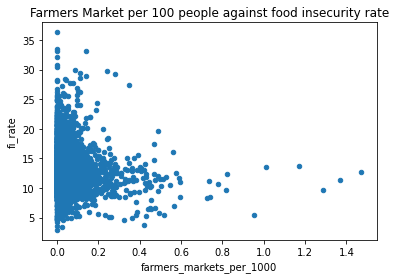

In [61]:
fi_fm = merged.plot.scatter(x='farmers_markets_per_1000',
                           y='fi_rate')

fi_fm.set_title("Farmers Market per 100 people against food insecurity rate")

Text(0.5, 1.0, 'Annual food budget shortfall against food insecurity rate')

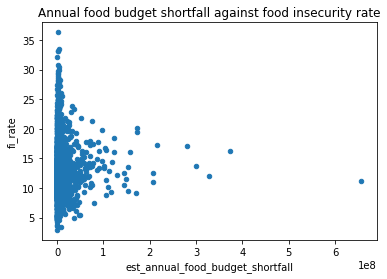

In [62]:
budget_fi = merged.plot.scatter(x='est_annual_food_budget_shortfall',
                           y='fi_rate')
budget_fi.set_title("Annual food budget shortfall against food insecurity rate")

Text(0.5, 1.0, 'cost per meal against food insecurity rate')

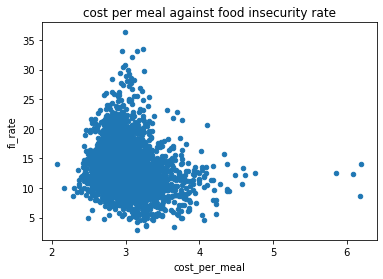

In [63]:
cpm_fi = merged.plot.scatter(x='cost_per_meal',
                           y='fi_rate')
cpm_fi.set_title("cost per meal against food insecurity rate")